#### from __future__ import print_function
import pandas as pd
import numpy as np
import os
import sys
import tensorflow as tf
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [5]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import sys

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [6]:
#Read the dataset
data = pd.read_csv('Air pollution Dataset.csv')

In [7]:
print('dataframe shape:', data.shape)

dataframe shape: (43824, 13)


In [8]:
#shows first five rows of the DataFrame
data.sample(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
41861,41862,2014,10,11,5,269.0,14,14.0,1020.0,SE,2.68,0,0
2901,2902,2010,5,1,21,61.0,1,24.0,1003.0,SE,53.63,0,0
27601,27602,2013,2,24,1,397.0,-8,-3.0,1028.0,cv,1.78,0,0
31267,31268,2013,7,26,19,62.0,20,26.0,1002.0,NW,21.90,0,0
41932,41933,2014,10,14,4,47.0,0,4.0,1022.0,NW,4.92,0,0


In [9]:
#Removing null values
data.dropna(subset=['pm2.5'], axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [10]:
data['datetime'] = data[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
data.sort_values('datetime', ascending=True, inplace=True)

E:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box plot of pm2.5')

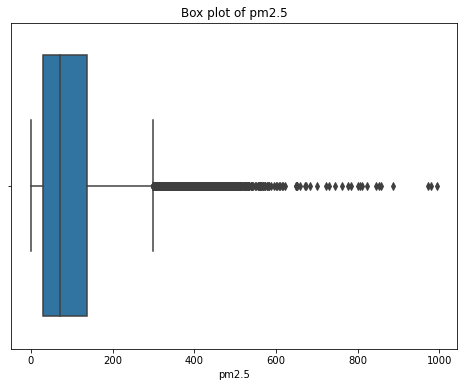

In [11]:
#box plot to visualize distribution of PM2.5
plt.figure(figsize=(8,6))
g = sns.boxplot(data['pm2.5'])
g.set_title('Box plot of pm2.5')

Text(0.5, 1.0, 'PM2.5 Time series')

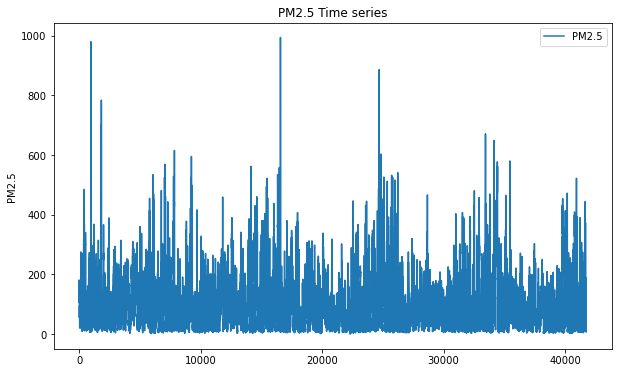

In [12]:
plt.figure(figsize=(10,6))
plt.plot(data['pm2.5'])
plt.legend(['PM2.5'] , loc='upper right')
plt.ylabel('PM2.5')
plt.title('PM2.5 Time series')

E:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'pm2.5 readings')

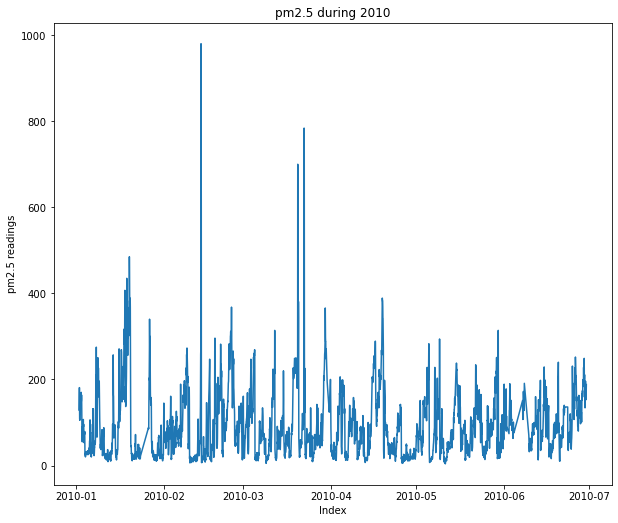

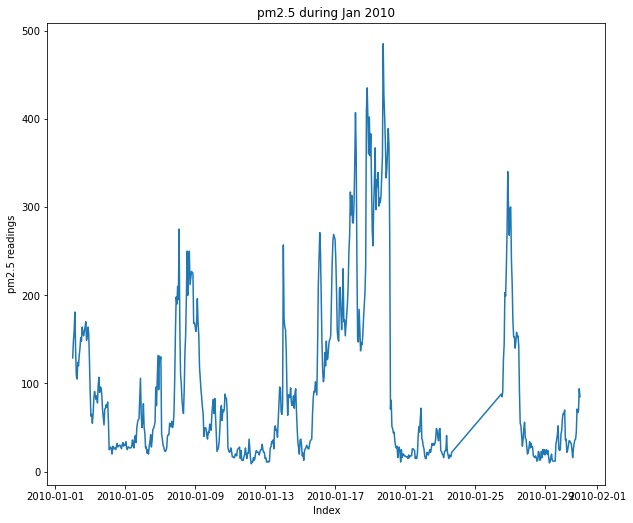

In [14]:
#Let's plot the series for six months to check if any pattern apparently exists.
plt.figure(figsize=(10, 8.5))
g = sns.lineplot(data['datetime'] , data['pm2.5'].loc[data['datetime']<=datetime.datetime(year=2010,month=6,day=30)])
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

#Let's zoom in on one month.
plt.figure(figsize=(10, 8.5))
g = sns.lineplot(data['datetime'] , data['pm2.5'].loc[data['datetime']<=datetime.datetime(year=2010,month=1,day=31)],)
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['scaled_pm2.5'] = scaler.fit_transform(np.array(data['pm2.5']).reshape(-1, 1))

In [10]:
#splitting the dataset into train and test. 
#Dataset contains data from Jan 1st, 2010 to Dec 31st, 2014. 
#The first fours years - 2010 to 2013 is used as train and 2014 is kept for test.

split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
data_train = data.loc[data['datetime']<split_date]
data_test = data.loc[data['datetime']>=split_date]
print('Shape of train:', data_train.shape)
print('Shape of test:', data_test.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [11]:
#First five rows of train
data_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [86]:
#First five rows of validation
data_test.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
33096,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.024145
33097,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.053320
33098,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.065392
33099,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.070423
33100,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.079477


In [12]:
#Reset the indices of the validation set
data_test.reset_index(drop=True, inplace=True)

Text(0, 0.5, 'Scaled pm2.5 readings')

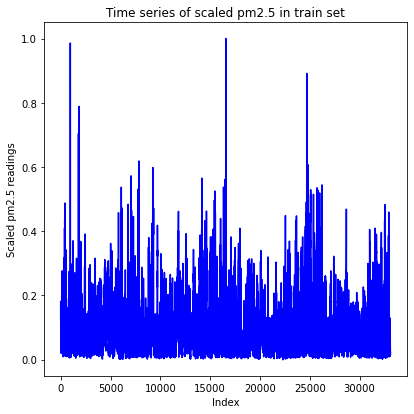

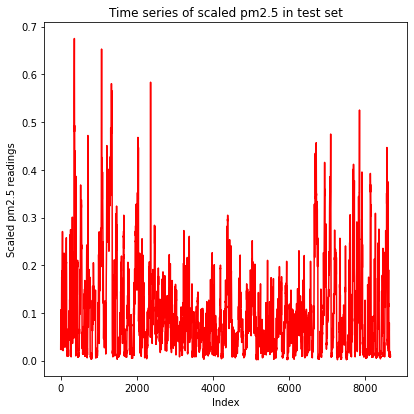

In [90]:
"""
The train and validation time series of scaled_pm2.5 is also plotted.
"""

plt.figure(figsize=(6.5, 6.5))
plt.plot(data_train['scaled_pm2.5'], color='b')
plt.title('Time series of scaled pm2.5 in train set')
plt.xlabel('Index')
plt.ylabel('Scaled pm2.5 readings')

plt.figure(figsize=(6.5, 6.5))
plt.plot(data_test['scaled_pm2.5'], color='r')
plt.title('Time series of scaled pm2.5 in test set')
plt.xlabel('Index')
plt.ylabel('Scaled pm2.5 readings')

In [13]:
def makeXy(time_series, nb_timesteps):
    """
    Input: 
           time_series: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, time_series.shape[0]):
        X.append(list(time_series.loc[i-nb_timesteps:i-1]))
        y.append(time_series.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [14]:
data_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [15]:
X_train, y_train = makeXy(data_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [16]:
X_test, y_test = makeXy(data_test['scaled_pm2.5'], 7)
print('Shape of test arrays:', X_test.shape, y_test.shape)

Shape of test arrays: (8654, 7) (8654,)


In [17]:
#X_train and X_test are reshaped to 3D arrays
X_train, X_test = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_test.shape)

Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


In [18]:
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [19]:
input_layer = Input(shape=(7,1), dtype='float32')

In [20]:
#Add zero padding
zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)

In [21]:
#Add 1D convolution layers
conv1D_layer1 = Conv1D(64, 3, strides=1, use_bias=True)(zeropadding_layer)
conv1D_layer2 = Conv1D(32, 3, strides=1, use_bias=True)(conv1D_layer1)

In [22]:
#Add AveragePooling1D layer
avgpooling_layer = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer2)

In [23]:
#Add Flatten layer
flatten_layer = Flatten()(avgpooling_layer)

In [24]:
#A couple of Dense layers are also added
dense_layer1 = Dense(32)(avgpooling_layer)
dense_layer2 = Dense(16)(dense_layer1)

In [25]:
dropout_layer = Dropout(0.2)(flatten_layer)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [26]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
ts_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
zero_padding1d_1 (ZeroPaddin (None, 9, 1)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 64)             256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 32)             6176      
_________________________________________________________________
average_pooling1d_1 (Average (None, 3, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 96)                0   

In [27]:
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, validation_data=(X_test, y_test),
             shuffle=True)

Train on 33089 samples, validate on 8654 samples
Epoch 1/20
33089/33089 [==============================] - 9s 284us/step - loss: 0.0190 - val_loss: 0.0155
Epoch 2/20
33089/33089 [==============================] - 6s 174us/step - loss: 0.0170 - val_loss: 0.0136
Epoch 3/20
33089/33089 [==============================] - 6s 177us/step - loss: 0.0168 - val_loss: 0.0150
Epoch 4/20
33089/33089 [==============================] - 6s 173us/step - loss: 0.0166 - val_loss: 0.0144
Epoch 5/20
33089/33089 [==============================] - 6s 176us/step - loss: 0.0164 - val_loss: 0.0146
Epoch 6/20
33089/33089 [==============================] - 6s 176us/step - loss: 0.0164 - val_loss: 0.0139
Epoch 7/20
33089/33089 [==============================] - 6s 177us/step - loss: 0.0162 - val_loss: 0.0134
Epoch 8/20
33089/33089 [==============================] - 6s 176us/step - loss: 0.0162 - val_loss: 0.0148
Epoch 9/20
33089/33089 [==============================] - 6s 184us/step - loss: 0.0163 - val_loss: 0.01

In [28]:
preds = ts_model.predict(X_test)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
mae = mean_absolute_error(data_test['pm2.5'].loc[7:], pred_pm25)
print('MAE for the test set:', round(mae, 4))

MAE for the test set: 13.973


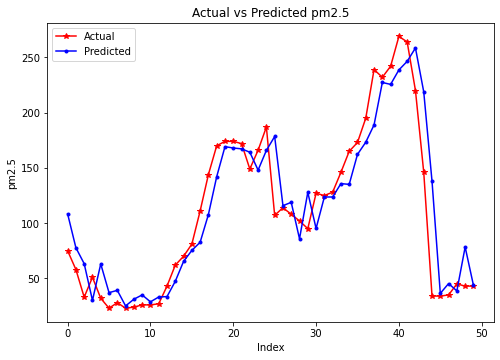

In [31]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(8, 5.5))
plt.plot(range(50), data_test['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')
plt.savefig('plot_CNN.jpeg', format='png', dpi=1000)

In [32]:
#R2 - CNN
from sklearn.metrics import r2_score
r2_score(data_test['pm2.5'].loc[7:56] , pred_pm25[:50] )

0.8455723524208043